# IT'S ABOUT TIME (AND ICE CREAM)
**_Enough with car prices already, I'm hungry_**
### Data Science 410 BB
#### University of Washington Professional & Continuing Education
#### Homework 8: Time Series Analysis
#### Leo Salemann, 3/1/18


# Fixin' to Get Ready

## Helper Functions

In [1]:
## Decomposition of the time series into components
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
ts.decomp <- function(df, col = 'elec.ts', span = 0.5, Mult = TRUE, is.df = TRUE){
  # if(Mult) temp = log(df[, col])  else temp = ts(df[, col]
  if(is.df) temp = log(df[, col])  
  else temp = df
  spans = span * length(temp)  
  fit <- stl(temp, s.window = "periodic", t.window = spans)
  plot(fit, main = paste('Decompositon of',col,'with lowess span = ', as.character(span)))
  fit$time.series
}

In [2]:
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
plot.acf <- function(df, col = 'remainder', is.df =TRUE){
  if(is.df) temp <- df[, col]
  else temp <- df
  par(mfrow = c(2,1))
  acf(temp, main = paste('ACF of', col))
  pacf(temp, main = paste('PACF of', col))
  par(mfrow = c(1,1))
}

In [3]:
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
ts.diff <- function(ts, lag = 1){
  diff(ts, lag = lag)
}

In [4]:
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
dist.ts = function(df, col = 'residual', bins = 40){
  par(mfrow = c(1,2))
  temp = as.vector(df)
  breaks = seq(min(temp), max(temp), length.out = (bins + 1))
  hist(temp, breaks = breaks, main = paste('Distribution of ', col), xlab = col)
  qqnorm(temp, main = paste('Normal Q-Q plot of ', col))
  par(mfrow = c(1,1))
}

In [5]:
## Function for ARIMA model estimation
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
ts.model = function(ts, col = 'remainder', order = c(0,0,1)){
  mod = arima(ts, order = order, include.mean = FALSE)
  print(mod)
  mod
}

## Load Data, Peek at Some Rows

In [6]:
getwd()
Dairy = read.table('CADairyProduction.csv', sep =",", header = TRUE)
head(Dairy)
tail(Dairy)

[1] "/home/vagrant/git/UW_DataScience/Q2/HW08"

Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
1995,Jan,4.370,51.595,2.112,0.9803,1,1,1
1995,Feb,3.695,56.086,1.932,0.8924,2,4,8
1995,Mar,4.538,68.453,2.162,0.8924,3,9,27
1995,Apr,4.280,65.722,2.130,0.8967,4,16,64
1995,May,4.470,73.730,2.227,0.8967,5,25,125
1995,Jun,4.238,77.994,2.124,0.9160,6,36,216


,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
223,2013,Jul,2.433,84.026,3.373,1.6923,223,49729,11089567
224,2013,Aug,2.169,78.382,3.400,1.6273,224,50176,11239424
225,2013,Sep,2.193,74.871,3.197,1.5519,225,50625,11390625
226,2013,Oct,2.284,70.011,3.338,1.5566,226,51076,11543176
227,2013,Nov,1.865,61.394,3.275,1.7537,227,51529,11697083
228,2013,Dec,2.345,53.653,3.473,1.6747,228,51984,11852352


**Data is monthly, runs from Jan 1995 to Dec 2013**

In [7]:
cat(2013-1994 , " years\n")
cat(12*(2013-1994), "months")

19  years
228 months

# Sationary & Seasonality

##  First Look

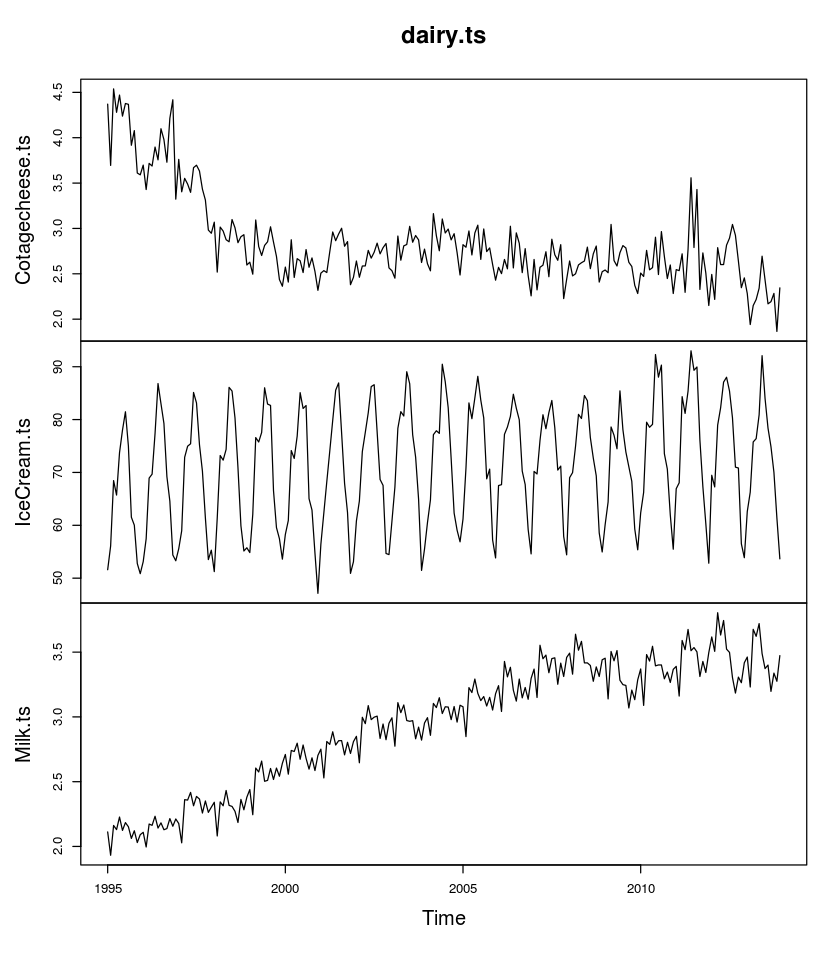

In [8]:
Cotagecheese.ts = ts(Dairy[,3], start = 1995, freq = 12)
IceCream.ts     = ts(Dairy[,4], start = 1995, freq = 12)
Milk.ts         = ts(Dairy[,5], start = 1995, freq = 12)

dairy.ts = cbind(Cotagecheese.ts, IceCream.ts, Milk.ts)
options(repr.pmales.extlot.width=8, repr.plot.height=8)
plot(dairy.ts)

- ** Strong seasonal component in Ice Cream**
- ** Potential seasonal components in Milk and Cottage Cheese, along with nonseasonal/multi-year trends**
- ** Strong trends in Milk and Cottage Cheese; potential trend in Ice Cream.**

### So far, it's ..

|Series        |Sationary? |Seasonal?   |
|--------------|----------:|:-----------|
|Cottage Cheese|No way     |Could be    |
|Ice Cream     |Could be   |Pretty sure |
|Milk          |No way     |Could be    |

# Decompose & Dive Deeper

## Separate Time Series into Seasonal, Trend, Residual Components

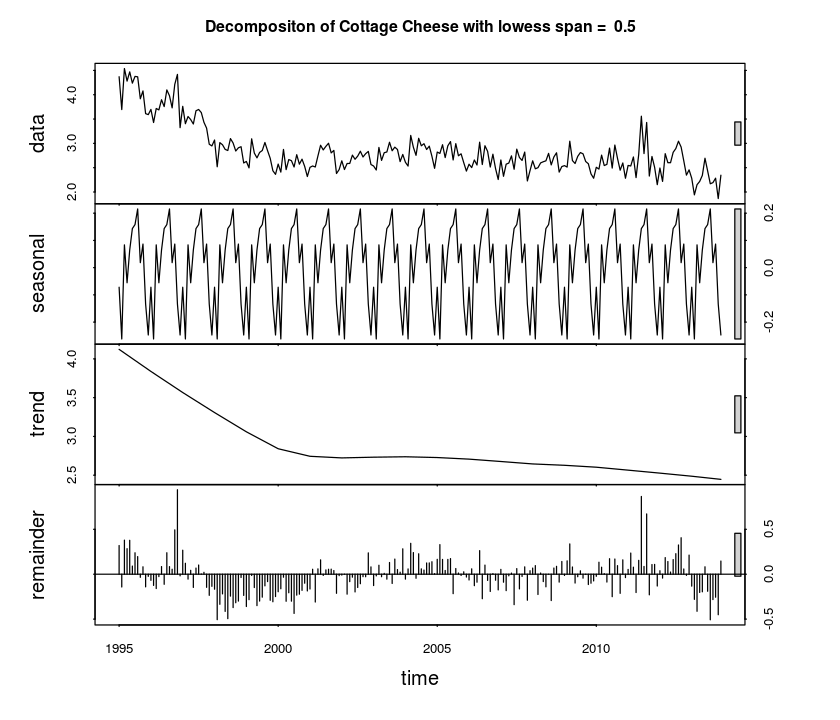

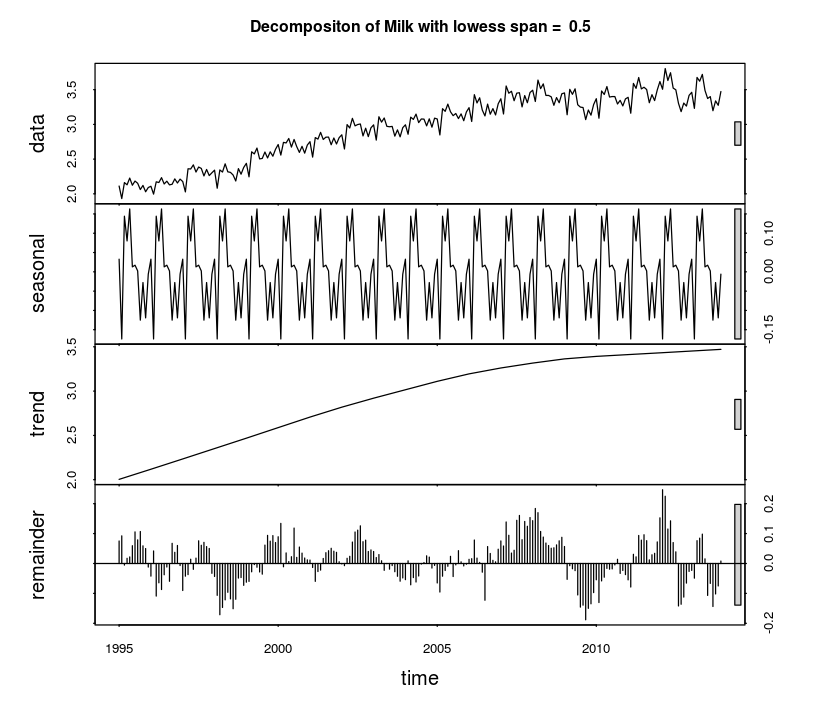

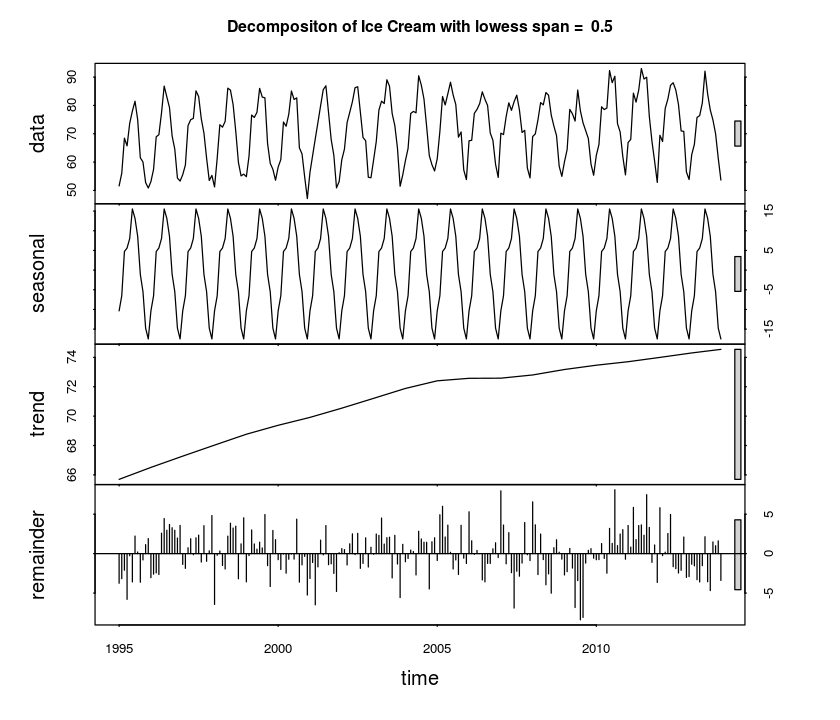

In [9]:
options(repr.pmales.extlot.width=2, repr.plot.height=6)

Cotagecheese.decomp = ts.decomp(Cotagecheese.ts, col= "Cottage Cheese", 
                                Mult = TRUE, is.df = FALSE)
Milk.decomp = ts.decomp(Milk.ts, col= "Milk", 
                        Mult = TRUE, is.df = FALSE)
IceCream.decomp = ts.decomp(IceCream.ts, col= "Ice Cream", 
                            Mult = TRUE, is.df = FALSE)

- **Strong trend component in all 3, can't be stationary. **
- **Seasonal component very clean for Ice Cream; a bit noisy for Milk & Cotage Cheese**
- **Remainders seem to have a bit of a seasonal pattern left in them.**

### So now, it's ..

|Series        |Sationary? |Seasonal?   |
|--------------|----------:|:-----------|
|Cottage Cheese|No way     |Pretty sure |
|Ice Cream     |No way     |Pretty sure |
|Milk          |No way     |Pretty sure |

## Check out the Autocorrelation (ACF/PACF)
_The evidence is pretty strong that the data's not staionary, but I already wrote the code in my draft notebook, so what the heck ..._

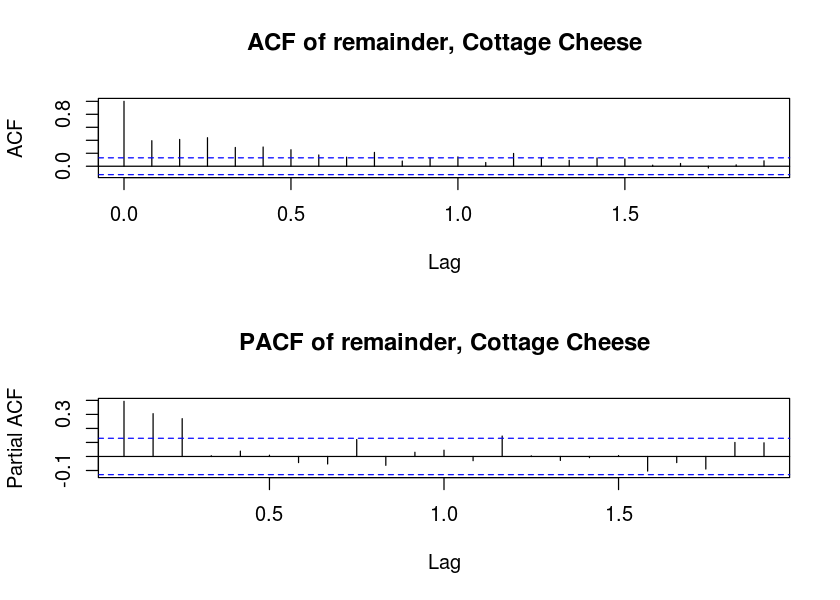

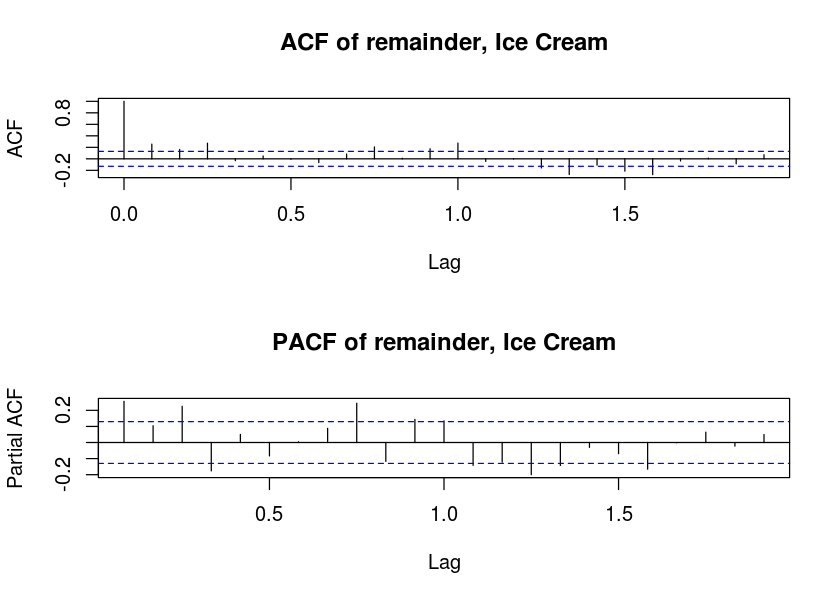

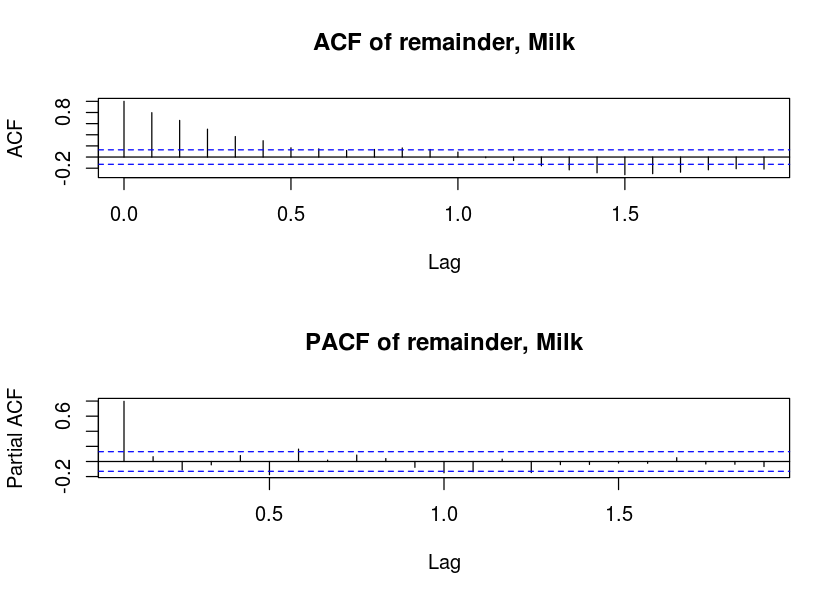

In [10]:
options(repr.pmales.extlot.width=8, repr.plot.height=5)
plot.acf(Cotagecheese.decomp[, 3], col = "remainder, Cottage Cheese", is.df = FALSE)
plot.acf(IceCream.decomp[, 3], col = "remainder, Ice Cream", is.df = FALSE)
plot.acf(Milk.decomp[, 3], col = "remainder, Milk", is.df = FALSE)

- **ACF crosses the 95% confidence interval for multiple lags, for all three products    **
- **PACF crosses the 95% confidence interval for more than one lags, for cotage cheese and ice cream**
- **All three products are non-stationary**

### So now, it's ..

|Series        |Sationary? |Seasonal?   |
|--------------|----------:|:-----------|
|Cottage Cheese|No     |Yes |
|Ice Cream     |No     |Yes |
|Milk          |No     |Yes |

# ARMA Analysis

In [11]:
arma.sweep = function(residuals, name){
  for (p in c(0,1,2)){
      for (q in (c(0,1,2))){
          cat("\n-----------------< order = c(",p,",0,",q,") >-----------------")
          ts.model(residuals, col = paste('ARIMA model for',name), order = c(p,0,q))
          # col = paste('ARIMA model for',name)
          #cat(name)

      }
  }
}

In [13]:
arma.sweep(IceCream.decomp[, 3], "Ice Cream")


-----------------< order = c( 0 ,0, 0 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)


sigma^2 estimated as 8.55:  log likelihood = -568.16,  aic = 1138.31

-----------------< order = c( 0 ,0, 1 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1
      0.2440
s.e.  0.0685

sigma^2 estimated as 8.05:  log likelihood = -561.32,  aic = 1126.63

-----------------< order = c( 0 ,0, 2 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1     ma2
      0.2227  0.0441
s.e.  0.0833  0.0910

sigma^2 estimated as 8.042:  log likelihood = -561.2,  aic = 1128.39

-----------------< order = c( 1 ,0, 0 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1
      0.2586
s.e.  0.0642

sigma^2 estimated as 7.981:  log likelihood = -560.34,  aic = 1124.68

-----------------< order = c( 1 ,0, 1 ) >-----------------
Call

**p=2, q=2 had the best (lowest) AIC**

# 12 Month Forecast

In [ ]:
## Cottage Cheese ()

In [ ]:
## Ice Cream ()

In [63]:
require(forecast)
fit.IceCream = auto.arima(IceCream.ts, max.order=5,
                              start.p=0,        start.q=0, 
                                max.p=2, max.d=1, max.q=2,
                              start.P=0,        start.Q=0,
                                max.P=2, max.D=1, max.Q=2)
summary(fit.IceCream )

Series: IceCream.ts 
ARIMA(2,0,2)(1,1,2)[12] with drift 

Coefficients:
         ar1     ar2     ma1      ma2    sar1     sma1     sma2   drift
      0.0693  0.6923  0.2573  -0.6495  0.0940  -0.5922  -0.2099  0.0386
s.e.  0.0981  0.0744  0.1035   0.0905  0.2083   0.2049   0.1404  0.0120

sigma^2 estimated as 7.847:  log likelihood=-530.33
AIC=1078.66   AICc=1079.53   BIC=1109.04

Training set error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.08362939 2.675641 2.057929 0.03414593 2.909644 0.7456002
                    ACF1
Training set -0.06221202


- **this looks quasi-reasonable**
fit.IceCream = auto.arima(IceCream.ts, max.order=5,
                              start.p=0,        start.q=0, 
                                max.p=2, max.d=1, max.q=2,
                              start.P=0,        start.Q=0,
                                max.P=2, max.D=1, max.Q=2)
                                
          
Coefficients:
         ar1     ar2     ma1      ma2    sar1     sma1     sma2   drift
      0.0693  0.6923  0.2573  -0.6495  0.0940  -0.5922  -0.2099  0.0386
s.e.  0.0981  0.0744  0.1035   0.0905  0.2083   0.2049   0.1404  0.0120

sigma^2 estimated as 7.847:  log likelihood=-530.33
AIC=1078.66   AICc=1079.53   BIC=1109.04

- **standard erros for the coeefficent.cients are the same order of magnitude as the coef's themselves**
fit.IceCream = auto.arima(IceCream.ts, max.order=7,
                              start.p=0,        start.q=0, 
                                max.p=3, max.d=2, max.q=3,
                              start.P=0,        start.Q=0,
                                max.P=3, max.D=1, max.Q=3)

Series: IceCream.ts 
ARIMA(2,0,3)(1,1,2)[12] with drift 

Coefficients:
          ar1     ar2     ma1     ma2     ma3    sar1     sma1     sma2   drift
      -0.0666  0.3239  0.3341  -0.177  0.3126  0.0070  -0.5143  -0.2550  0.0376
s.e.   0.1528  0.1668  0.1480   0.178  0.0934  0.2177   0.2090   0.1446  0.0096

sigma^2 estimated as 7.67:  log likelihood=-527.15
AIC=1074.29   AICc=1075.37   BIC=1108.05

fit.IceCream = auto.arima(IceCream.ts, max.order=7,
                              start.p=0,        start.q=0, 
                                max.p=3, max.d=3, max.q=3,
                              start.P=0,        start.Q=0,
                                max.P=3, max.D=3, max.Q=3)
                                Series: IceCream.ts 
ARIMA(2,0,3)(1,1,2)[12] with drift 

Coefficients:
          ar1     ar2     ma1     ma2     ma3    sar1     sma1     sma2   drift
      -0.0666  0.3239  0.3341  -0.177  0.3126  0.0070  -0.5143  -0.2550  0.0376
s.e.   0.1528  0.1668  0.1480   0.178  0.0934  0.2177   0.2090   0.1446  0.0096


Forecast method: ARIMA(2,0,2)(1,1,2)[12] with drift

Model Information:
Series: IceCream.ts 
ARIMA(2,0,2)(1,1,2)[12] with drift 

Coefficients:
         ar1     ar2     ma1      ma2    sar1     sma1     sma2   drift
      0.0693  0.6923  0.2573  -0.6495  0.0940  -0.5922  -0.2099  0.0386
s.e.  0.0981  0.0744  0.1035   0.0905  0.2083   0.2049   0.1404  0.0120

sigma^2 estimated as 7.847:  log likelihood=-530.33
AIC=1078.66   AICc=1079.53   BIC=1109.04

Error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.08362939 2.675641 2.057929 0.03414593 2.909644 0.7456002
                    ACF1
Training set -0.06221202

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2014       63.43153 59.84080 67.02227 57.93997 68.92309
Feb 2014       68.37060 64.59323 72.14797 62.59361 74.14758
Mar 2014       78.00569 74.22103 81.79034 72.21756 83.79381
Apr 2014       79.39571 75.52154 83.26989 73.47067 85.32075
May 2014       81.7044

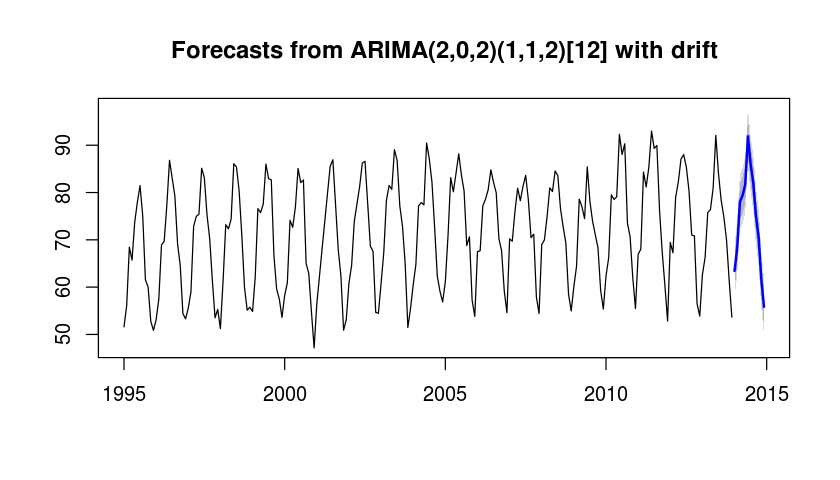

In [64]:
## Make the forecast for the next year
IceCream.forecast = forecast(fit.IceCream , h=12)
summary(IceCream.forecast)
plot(IceCream.forecast)

## Milk (p=2, q=2 had the best AIC)